In [1]:
%run Multiplex_function_library_FINAL.ipynb

In [2]:
#Import datasets, hard code
global_dir_path = "C://Users/chris/OneDrive/Desktop/MIT postdoc project/ABN project/Lung cancer/Headspace_data"
#4wks
dir_path0 = global_dir_path + '/2023_0809_Breath_EA_4w'
dir_path1 = global_dir_path + '/2023_1019_Breath_EA_4w'
#5wks
dir_path2 = global_dir_path + '/2024_0520_Breath_EA_5w'
dir_path3 = global_dir_path + '/2024_1105_Breath_EA_5w'
#6wks
dir_path4 = global_dir_path + '/2024_0116_Breath_EA_6w' 
dir_path5 = global_dir_path + '/2024_0628_Breath_EA_6w'
#Relapse
dir_path6 = global_dir_path + '/2024_0721_Breath_ER_10w'
dir_path7 = global_dir_path + '/2024_1122_Breath_ER_10w'

In [3]:
#import excel files using panda as df, hard code 
dict_name = {}
#4wks
dict_name["name0"] = dir_path0 + '/Zscore_AUC_4w_080923.xlsx' 
dict_name["name1"] = dir_path1 + '/Zscore_AUC_4w_101923.xlsx'
#5wks
dict_name["name2"] = dir_path2 + '/Zscore_AUC_5w_052024.xlsx'
dict_name["name3"] = dir_path3 + '/Zscore_AUC_5w_110524.xlsx'

#6wks
dict_name["name4"] = dir_path4 + '/Zscore_AUC_6w_011624.xlsx'
dict_name["name5"] = dir_path5 + '/Zscore_AUC_6w_062824.xlsx'

#Relapse
dict_name["name6"] = dir_path6 + '/Zscore_AUC_10w_072124.xlsx'
dict_name["name7"] = dir_path7 + '/Zscore_AUC_10w_112224.xlsx'

dict_df = {}
for i in range(0, len(dict_name)):
    dict_df["df"+ str(i)] = pd.read_excel(dict_name["name" + str(i)])

In [4]:
df_4w = pd.concat([dict_df["df0"], dict_df["df1"]], axis=0, ignore_index=True)
df_5w = pd.concat([dict_df["df2"], dict_df["df3"]], axis=0, ignore_index=True)
df_6w = pd.concat([dict_df["df4"], dict_df["df5"]], axis=0, ignore_index=True)
df_10w = pd.concat([dict_df["df6"], dict_df["df7"]], axis=0, ignore_index=True)

In [ ]:
param_dist = {'n_estimators':[100, 300, 500, 1000], 
              'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],
              'min_samples_leaf' : [1, 2, 3, 4, 5], 
              'random_state': [0, 42],
              'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.6, 0.8],
              'max_features' : ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]}

clf = GradientBoostingClassifier()

grid_search = GridSearchCV(clf, 
                           param_grid = param_dist,
                           cv=5, verbose=1)

In [ ]:
best_clf(df_4w, 0.25)
best_clf(df_5w, 0.25)
best_clf(df_6w, 0.25)
best_clf(df_10w, 0.25)

In [5]:
#4wks
clf_4w = GradientBoostingClassifier(n_estimators=1000, max_depth=10, 
                                    max_features=0.2, random_state=42, 
                                    min_samples_leaf=5, learning_rate=0.8).fit(test_train_split(df_4w, 0.25)[20], 
                                                                               test_train_split(df_4w, 0.25)[21])

In [6]:
#5wks
clf_5w = GradientBoostingClassifier(n_estimators=500, max_depth=4,
                                    max_features=0.6, random_state=42, 
                                    min_samples_leaf=4, learning_rate=0.1).fit(test_train_split(df_5w, 0.25)[20], 
                                                                               test_train_split(df_5w, 0.25)[21])

In [7]:
#6wks
clf_6w = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                                    max_features=0.8, random_state=0, 
                                    min_samples_leaf=1, learning_rate=0.3).fit(test_train_split(df_6w, 0.25)[20],
                                                                               test_train_split(df_6w, 0.25)[21])

In [8]:
#Relapse
clf_10w = GradientBoostingClassifier(n_estimators=300, max_depth=1,
                                     max_features='sqrt', random_state=0, 
                                     min_samples_leaf=1, learning_rate=0.1).fit(test_train_split(df_10w, 0.25)[20],
                                                                                test_train_split(df_10w, 0.25)[21])

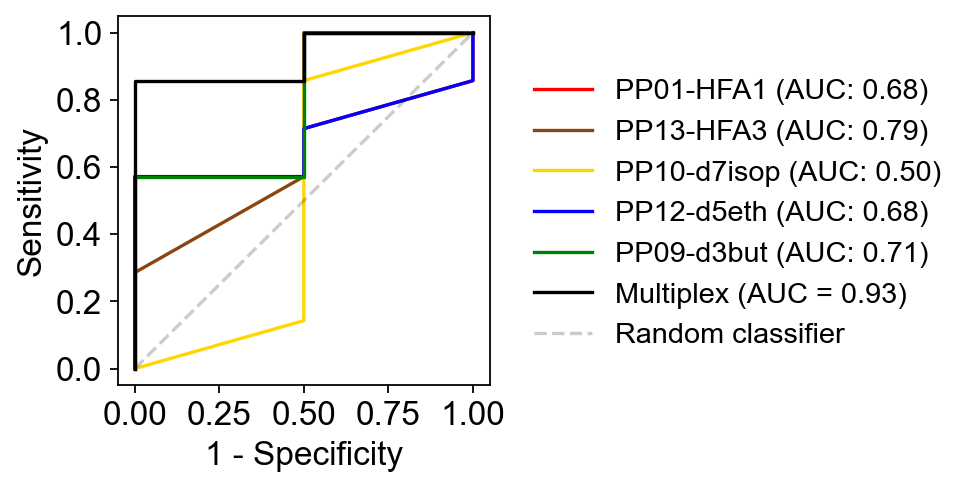

In [9]:
plot_roc_allns(df_6w, clf_6w, 0.25)

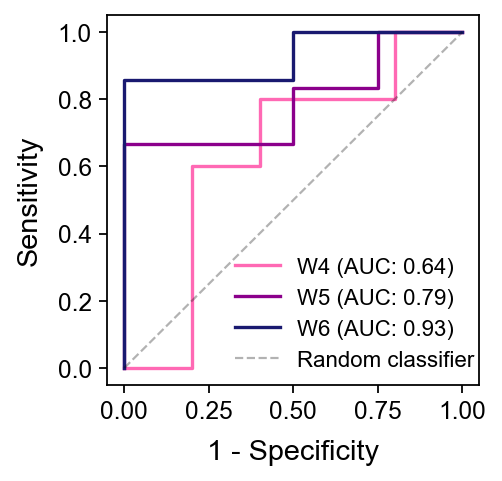

In [10]:
plot_roc_allwks(df_4w, df_5w, df_6w, clf_4w, clf_5w, clf_6w, 0.25)

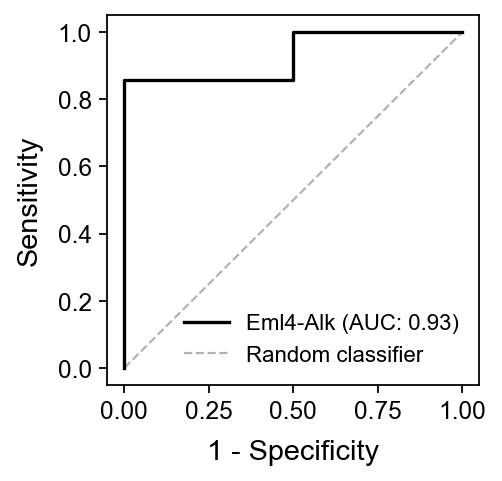

In [11]:
plot_single_wk(df_6w, clf_6w, 0.25)

### Cross validation

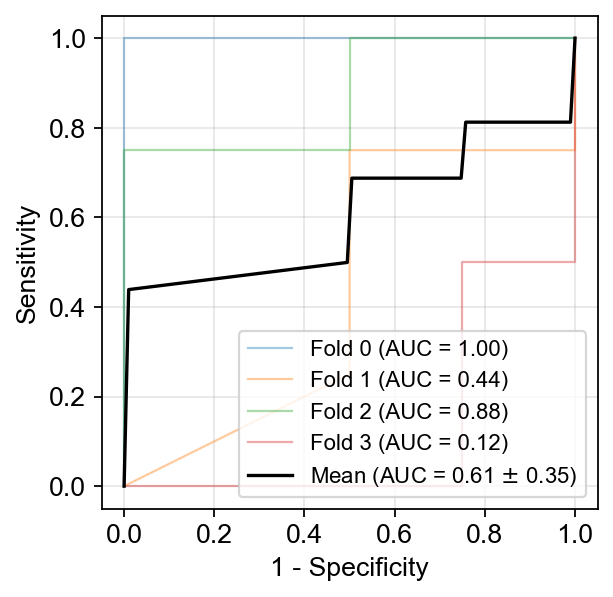

{'mean_auc': 0.607795122946638,
 'std_auc': 0.34903606099513557,
 'mean_f1': 0.6865079365079365,
 'std_f1': 0.2209073914240759}

In [12]:
#4wks 
kfold_4w = GradientBoostingClassifier(n_estimators=1000, max_depth=10, 
                                      max_features=0.2, random_state=42, 
                                      min_samples_leaf=5, learning_rate=0.8)

X_train_4w = test_train_split(df_4w, 0.25)[20]
y_train_4w = test_train_split(df_4w, 0.25)[21]
cross_val_with_f1(kfold_4w, X_train_4w, y_train_4w)

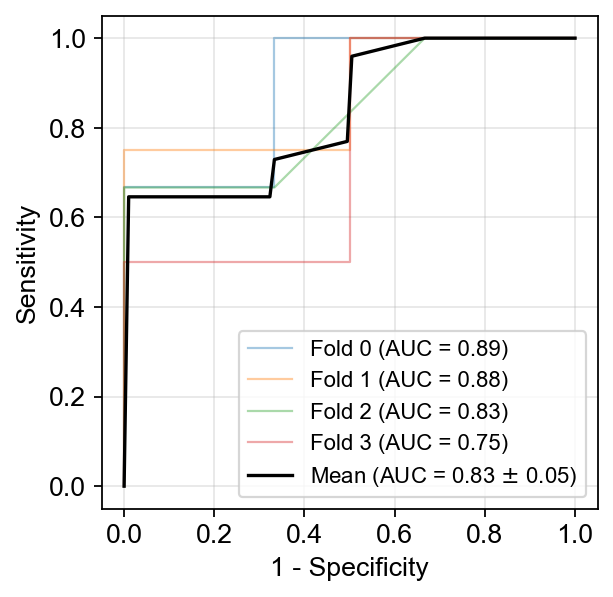

{'mean_auc': 0.8339646464646464,
 'std_auc': 0.05412658773652743,
 'mean_f1': 0.7380952380952381,
 'std_f1': 0.12371791482634834}

In [13]:
#5w
kfold_5w = GradientBoostingClassifier(n_estimators=500, max_depth=4,
                                      max_features=0.6, random_state=42, 
                                      min_samples_leaf=4, learning_rate=0.1)

X_train_5w = test_train_split(df_5w, 0.25)[20]
y_train_5w = test_train_split(df_5w, 0.25)[21]
cross_val_with_f1(kfold_5w, X_train_5w, y_train_5w)

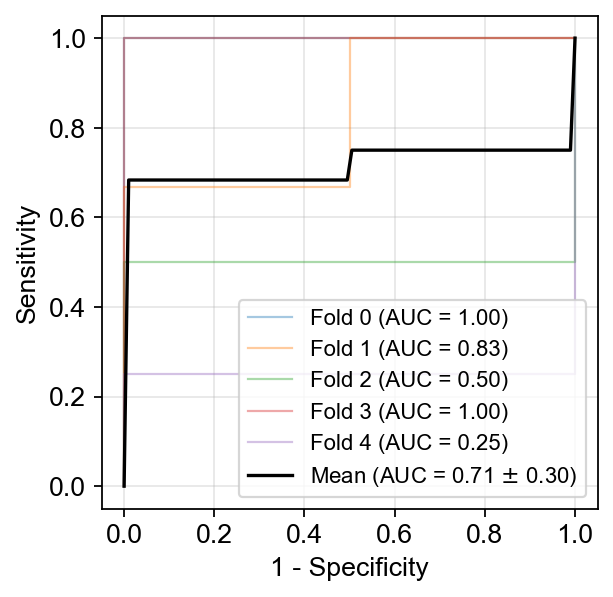

{'mean_auc': 0.7144781144781144,
 'std_auc': 0.29627314724385295,
 'mean_f1': 0.7214285714285713,
 'std_f1': 0.16425465544919782}

In [14]:
#6w
kfold_6w = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                                      max_features=0.8, random_state=0,
                                      min_samples_leaf=1, learning_rate=0.3)

X_train_6w = test_train_split(df_6w, 0.25)[20]
y_train_6w = test_train_split(df_6w, 0.25)[21]
cross_val_with_f1(kfold_6w, X_train_6w, y_train_6w)

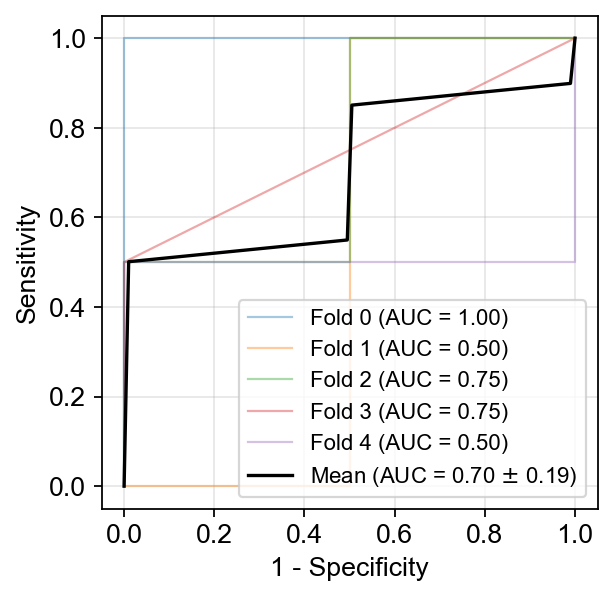

{'mean_auc': 0.6979797979797981,
 'std_auc': 0.18708286933869706,
 'mean_f1': 0.7580952380952379,
 'std_f1': 0.07751234266428879}

In [15]:
#Relapse
kfold_10w = GradientBoostingClassifier(n_estimators=300, max_depth=1,
                                       max_features='sqrt', random_state=0, 
                                       min_samples_leaf=1, learning_rate=0.1)

X_train_10w = test_train_split(df_10w, 0.25)[20]
y_train_10w = test_train_split(df_10w, 0.25)[21]
cross_val_with_f1(kfold_10w, X_train_10w, y_train_10w)